Разбор аналитических методов вычисления преобразования Фурье некоторых материнских вейвлетов, необходимых для вычисления вейвет преобразования.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

In [2]:
import sympy as sp

Вейвлет Хаара

$$
\psi(x) = \begin{cases}
  1,\ 0 \leq x < \frac{1}{2} \\
  -1,\ \frac{1}{2} \leq x < 1  \\
  0,\ x < 0\ , x \geq 1
\end{cases}
$$

что эквивалентно:
$$
\psi(x) = \theta(x) - 2\theta(x-\frac{1}{2})  + \theta(x-1) = \frac{1}{2} sig(x) - sig(x-\frac{1}{2})  + \frac{1}{2} sig(x-1)
$$

In [3]:
# определение функции как в задаче
def signmy(x):
  if x<0 or x >=1:
    return 0
  elif x >= 0 and x < 1/2:
    return 1
  else:
    return -1

In [4]:
# определение функции л разложения ниже
def sign_reg(x):
  if x==0:
    return 0
  elif x > 0 :
    return 1
  else:
    return -1
  

def heavis(x):
  if x<0:
    return 0
  elif x >= 0 :
    return 1


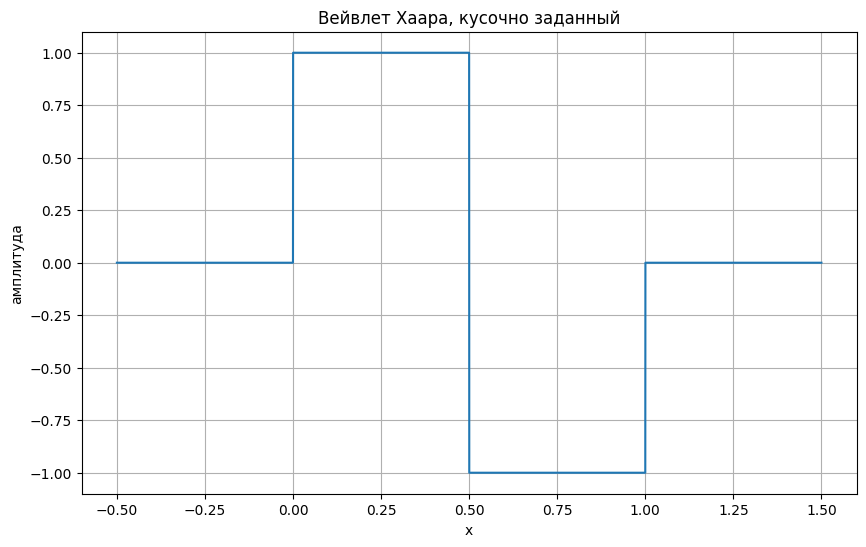

In [26]:
x = np.linspace(-1/2,3/2,10000)

fx = np.zeros((10000))

for i in range(0, 10000):
  fx[i] = signmy(x[i])

plt.figure(figsize=(10, 6))
plt.plot(x, fx)
plt.title("Вейвлет Хаара, кусочно заданный")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.grid()
plt.show()

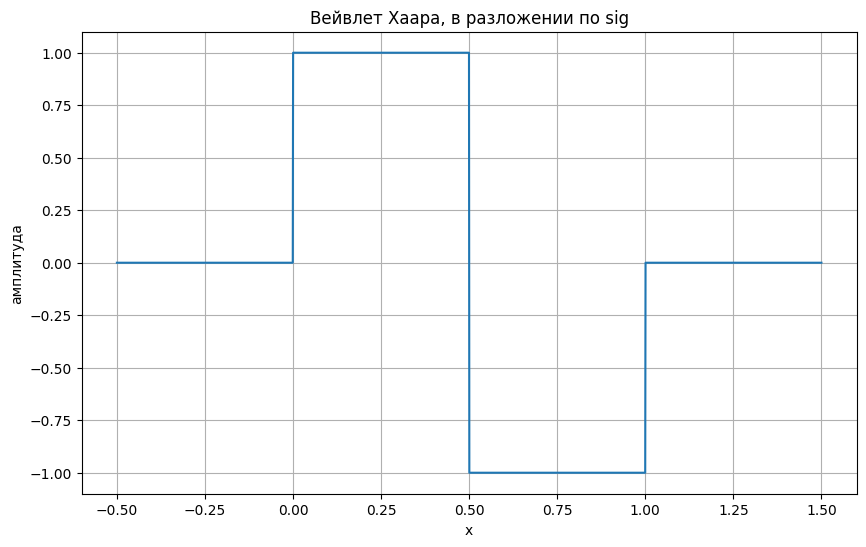

In [27]:
NN = 2048
x = np.linspace(-1/2,3/2,NN)
fx1 = np.zeros((NN))

for i in range(0, NN):
  fx1[i] = 1/2* sign_reg(x[i]) - sign_reg(x[i]-1/2) + 1/2*sign_reg(x[i]-1)
  # fx1[i] =  heavis(x[i])   + heavis(x[i]-1) - 2*heavis(x[i]-1/2)
  
plt.figure(figsize=(10, 6))
plt.plot(x, fx1)
plt.title("Вейвлет Хаара, в разложении по sig")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.grid()
plt.show()

нужные свойства преобразования Фурье:
$$
F[\theta(x)](\Omega) = \frac{1}{i\Omega} + \pi \delta(\Omega)
$$

$$
F[sig(x)](\Omega) = \frac{2}{i\Omega}  
$$

$$
F[f(x-a)](\Omega) =  e^{-i\Omega a}\tilde{f}(\Omega)
$$

$$
F[\psi(x)] = F[\theta(x)] - 2F[\theta(x-\frac{1}{2})]  + F[\theta(x-1)]
$$

так не получилось:
$$
F[\psi(x)] = \left( \frac{1}{i\Omega} + \pi \delta(\Omega)\right) - 2e^{-\frac{i\Omega }{2}}\left( \frac{1}{i\Omega} + \pi \delta(\Omega)\right) + e^{-i\Omega}\left( \frac{1}{i\Omega} + \pi \delta(\Omega)\right)
$$

но
$$
F[\psi(x)] = \frac{1}{2}F[sig(x)] - F[sig(x-\frac{1}{2})] + \frac{1}{2}F[sig(x-1)]
$$
$$
F[\psi(x)] = \left( \frac{1}{i\Omega}\right) - 2e^{-\frac{i\Omega }{2}}\left( \frac{1}{i\Omega}\right) + e^{-i\Omega}\left( \frac{1}{i\Omega}\right)
$$

но
$$
\tilde{\psi}(\Omega) = \int\limits_{-\infty}^{\infty}dx\ \psi(x)e^{-i\Omega x} = 
\int\limits_{-\infty}^{0}dx\ 0*e^{-i\Omega x} 
+ \int\limits_{1}^{\infty}dx\ 0*e^{-i\Omega x} 
+ \int\limits_{0}^{\frac{1}{2}}dx\ e^{-i\Omega x} 
- \int\limits_{\frac{1}{2}}^{1}dx\ e^{-i\Omega x} 

$$

$$
\tilde{\psi}(\Omega) = 
\int\limits_{0}^{\frac{1}{2}}dx\ e^{-i\Omega x} 
- \int\limits_{\frac{1}{2}}^{1}dx\ e^{-i\Omega x} =
\int\limits_{0}^{\frac{1}{2}}dx\ \left( \cos{(\Omega x)} - i \sin{(\Omega x)} \right)
- \int\limits_{\frac{1}{2}}^{1}dx\ \left( \cos{(\Omega x)} - i \sin{(\Omega x)} \right)
$$

$$
\tilde{\psi}(\Omega) = 
\int\limits_{0}^{\frac{1}{2}}dx\ \cos{(\Omega x)} - i \int\limits_{0}^{\frac{1}{2}}dx\ \sin{(\Omega x)}
-\int\limits_{\frac{1}{2}}^{1}dx\ \cos{(\Omega x)} + i \int\limits_{\frac{1}{2}}^{1}dx\ \sin{(\Omega x)} 
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(\int\limits_{0}^{\frac{1}{2}}d(\Omega x)\ \cos{(\Omega x)} - i \int\limits_{0}^{\frac{1}{2}}d(\Omega x)\ \sin{(\Omega x)}
- \int\limits_{\frac{1}{2}}^{1}d(\Omega x)\ \cos{(\Omega x)} + i \int\limits_{\frac{1}{2}}^{1}d(\Omega x)\ \sin{(\Omega x)}\right)
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left( \left. \sin{(\Omega x)} \right|_{0}^{\frac{1}{2}} + i  \left.\cos{(\Omega x)}\right|_{0}^{\frac{1}{2}}
- \left. \sin{(\Omega x)}\right|_{\frac{1}{2}}^{1} - i \left. \cos{(\Omega x)}\right) \right|_{\frac{1}{2}}^{1}
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  \sin{(\frac{\Omega}{2})}  + i  \cos{(\frac{\Omega}{2})} - i
-  \sin{(\Omega)} + \sin{(\frac{\Omega}{2})} - i \cos{(\Omega )} + i \cos{(\frac{\Omega}{2})}\right) 
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  2\left(\sin{(\frac{\Omega}{2})}  + i  \cos{(\frac{\Omega}{2})}\right) - i
-  \sin{(\Omega)}  - i \cos{(\Omega )} \right) 
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  2 i \left(\cos{(\frac{\Omega}{2}) - i\sin{(\frac{\Omega}{2})}}\right) - i
- i\left( \cos{(\Omega )} - i\sin{(\Omega)} \right) \right) 
$$

Ответ:
$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  2 i e^{(-i\frac{\Omega}{2})}- i
- ie^{-i\Omega} \right) 
$$

спектральная плотность:
$$
P(\Omega) = |\tilde{\psi}(\Omega)|^2
$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left( 2 i e^{(-i\frac{\Omega}{2})} - i - ie^{-i\Omega} \right) \left( -2 i e^{(i\frac{\Omega}{2})} + i + ie^{i\Omega} \right) 
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  \sin{(\frac{\Omega}{2})}  + i  \cos{(\frac{\Omega}{2})} - i
-  \sin{(\Omega)} + \sin{(\frac{\Omega}{2})} - i \cos{(\Omega )} + i \cos{(\frac{\Omega}{2})}\right) 
$$

$$
\tilde{\psi}(\Omega) = 
\frac{1}{\Omega}\left(  
    2\sin{(\frac{\Omega}{2})}  -  \sin{(\Omega)} 
+
i \left( 2\cos{(\frac{\Omega}{2})} - 1

 -  \cos{(\Omega )}  \right) \right) 
$$

$$
|\tilde{\psi}(\Omega)|^2 = 
\frac{1}{\Omega^2}\left(  

    \left( 2\sin{(\frac{\Omega}{2})}  -  \sin{(\Omega)} \right)^2

+

\left( 2\cos{(\frac{\Omega}{2})} - 1 -  \cos{(\Omega )}  \right) \right)^2

$$

$$
|\tilde{\psi}(\Omega)|^2 = 
\frac{1}{\Omega^2}\left(  

    \left( 2\sin{(\frac{\Omega}{2})}  -  \sin{(\Omega)} \right)^2

+

\left( 2\cos{(\frac{\Omega}{2})} - 1 -  \cos{(\Omega )}  \right) \right)^2

$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left( 2 i e^{(-i\frac{\Omega}{2})}\left( -2 i e^{(i\frac{\Omega}{2})} + i + ie^{i\Omega} \right)  - i \left( -2 i e^{(i\frac{\Omega}{2})} + i + ie^{i\Omega} \right)  - ie^{-i\Omega}\left( -2 i e^{(i\frac{\Omega}{2})} + i + ie^{i\Omega} \right)  \right) 
$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left(  \left( 4 - 2e^{(-i\frac{\Omega}{2})} -2e^{(-i\frac{\Omega}{2})}e^{i\Omega} \right) 
 -  \left( 2 e^{(i\frac{\Omega}{2})} -1 - e^{i\Omega} \right) 
 - \left( 2e^{(i\frac{\Omega}{2})}e^{-i\Omega} - e^{-i\Omega} -1  \right)  \right) 
$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left( 
      4 - 2e^{(-i\frac{\Omega}{2})} -2e^{(-i\frac{\Omega}{2})}e^{i\Omega} 
 -  2 e^{(i\frac{\Omega}{2})} +1 + e^{i\Omega} 
 - 2e^{(i\frac{\Omega}{2})}e^{-i\Omega} + e^{-i\Omega} +1   \right) 
$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left( 
      6 + 2\cos{(\Omega)} - 4\cos{(\frac{\Omega}{2})} - 4 \cos{(\frac{\Omega}{2})}
  \right) 
$$

$$
P(\Omega) = \frac{1}{\Omega^2}\left( 
      6 + 2\cos{(\Omega)} -8 \cos{(\frac{\Omega}{2})}
  \right) 
$$

In [7]:
# проверка:
Omega = sp.symbols('Omega', real=True)
psi_om = (1/Omega) * (2*sp.I*sp.exp(-sp.I*Omega/2) - sp.I - sp.I*sp.exp(-sp.I*Omega))
psi_om_conj = psi_om.conjugate()
# psi_om_conj
P_om = (psi_om*psi_om_conj)
P_om = sp.expand(P_om)
P_om = P_om.simplify()
# P_om.subs(sp.exp(sp.I*Omega/2) + sp.exp(-sp.I*Omega/2), sp.cos(Omega/2))
P_om

-4*exp(I*Omega/2)/Omega**2 + exp(I*Omega)/Omega**2 + 6/Omega**2 + exp(-I*Omega)/Omega**2 - 4*exp(-I*Omega/2)/Omega**2

In [8]:
P_om = P_om.rewrite(sp.cos)
P_om = sp.expand(P_om)
# P_om.simplify()
P_om

-8*cos(Omega/2)/Omega**2 + 2*cos(Omega)/Omega**2 + 6/Omega**2

In [9]:
@nb.njit
def analitical_solut_1(omega):
    return (1/(omega**2))*(6 + 2*np.cos(omega)-8*np.cos(omega/2))

<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/1758577132.py:39: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/1758577132.py:40: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


131072


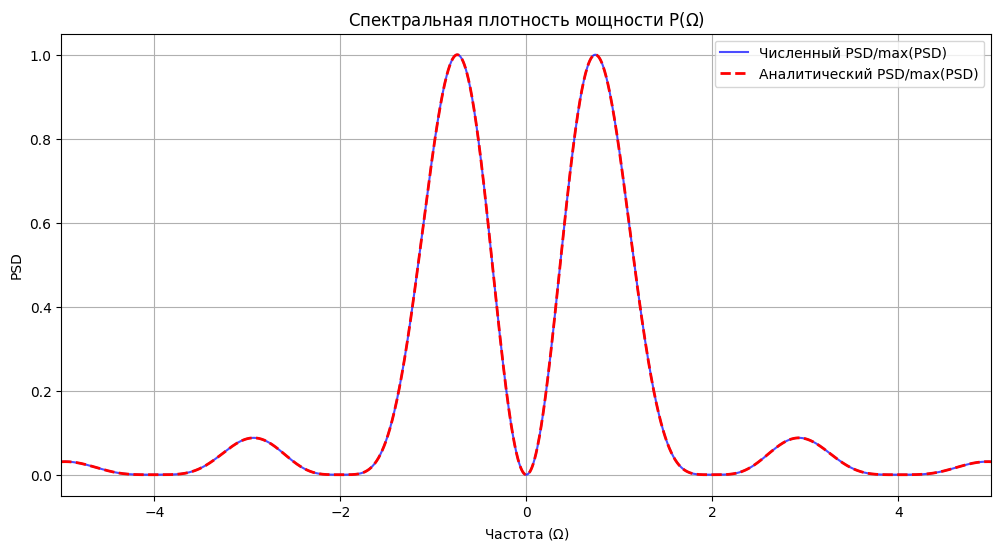

In [10]:
# Параметры сигнала
mnog = 17
N = 2**mnog 
print(N)
x = np.linspace(-1111, 9, N )  # Дискретные значения x
dx = x[2] - x[1]
f_s = 1/dx
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # Соответствующие частоты
 
psi = np.zeros((N))

for i in range(0, N):
  psi[i] = signmy(x[i])

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi))  # Сдвигаем нулевую частоту в центр

 
psd_numerical = np.abs(psi_fft) **2 

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = freqs != 0  
psd_analytic = np.zeros(N)
psd_analytic[mask] = analitical_solut_1(freqs[mask]*(2*np.pi))
 
psd_analytic[~mask] = 0  #  

# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(psd_numerical)
normir_analit= np.max(psd_analytic)
# Численный PSD
plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7)  

# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=2)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)  # Полный диапазон частот
plt.show()

Равенство Персеваля:
$$
\psi(x) = \begin{cases}
  1,\ 0 \leq x < \frac{1}{2} \\
  -1,\ \frac{1}{2} \leq x < 1  \\
  0,\ x < 0\ , x \geq 1
\end{cases}
$$


$$
\int\limits_{-\infty}^{\infty}dx\ \psi(x)*\psi(x) = 
\int\limits_{0}^{\frac{1}{2}}dx\ + \int\limits_{\frac{1}{2}}^{1}dx\ = 
\left. x \right|_0^{\frac{1}{2}} + \left. x \right|_{\frac{1}{2}}^1 = 
{\frac{1}{2}} - 0 + 1 - {\frac{1}{2}} = 1
$$



$$
P(\Omega) = \frac{1}{\Omega^2}\left( 
      6 + 2\cos{(\Omega)} -8 \cos{(\frac{\Omega}{2})}
  \right) 
$$


$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ P(\Omega) = 

 \int\limits_{-\infty}^{\infty}d\Omega\ 
\frac{1}{2\pi \Omega^2}
\left( 
      6 + 2\cos{(\Omega)} -8 \cos{(\frac{\Omega}{2})}
  \right) = 
$$


$$
 \lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  \frac{1}{2\pi \Omega^2}

\left( 
      6 + 2\cos{(\Omega)} -8 \cos{(\frac{\Omega}{2})}
  \right) = 
$$

$$

  \frac{1}{2\pi} \left(
  6\lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\ \frac{1}{\Omega^2} 
+ 2 \lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  \frac{1}{\Omega^2}\cos{(\Omega)} 
- 8 \lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  \frac{1}{\Omega^2}\cos{(\frac{\Omega}{2})} \right)= 

$$ 

$$
 \frac{1}{2\pi}\lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  
 


\left( 
      6\frac{1}{\Omega^2} + 2\frac{1}{\Omega^2}\cos{(\Omega)} -8 \frac{1}{\Omega^2}\cos{(\frac{\Omega}{2})}
  \right) = 
$$

$$
2\cos{(\Omega)} - 8 \cos{(\frac{\Omega}{2})} = 
2 (2\cos^2(\frac{\Omega}{2}) -1) - 8 (\cos{(\frac{\Omega}{2})} ) = 

$$

$$

4\cos^2(\frac{\Omega}{2}) - 2 - 8 \cos{(\frac{\Omega}{2})}  = 4(1 - \cos(\frac{\Omega}{2}))^2 - 6

$$

$$
 4(1 - \cos(\frac{\Omega}{2}))^2 - 6 = 

 4(2\sin^2(\frac{\Omega}{4}))^2 - 6 = 

 16\sin^4(\frac{\Omega}{4}) - 6 

$$

$$
 \frac{1}{2\pi}\lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  
 
\frac{1}{\Omega^2}

\left( 
      6 + 16\sin^4(\frac{\Omega}{4}) - 6 
  \right) = 
$$

$$
 \frac{1}{2\pi}\lim_{\epsilon \to \infty}\int\limits_{-\epsilon}^{\epsilon}d\Omega\  
 
\frac{1}{\Omega^2}

\left( 
     16\sin^4(\frac{\Omega}{4}) 
  \right) = 
$$


в силу симметрии 
$$
 \frac{1}{\pi}\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}d\Omega\  
 
\frac{1}{\Omega^2}

\left( 
     16\sin^4(\frac{\Omega}{4}) 
  \right) = 
$$

$$
 \frac{16}{\pi}\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}d\Omega\  
 
\frac{\sin^4(\frac{\Omega}{4}) }{\Omega^2} =
$$

$$
4t = \Omega, \ d\Omega= 4dt
$$
$$
 \frac{4}{\pi}\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt\  
 
\frac{\sin^4(t) }{t^2} =
$$

$$
u = \sin^4(t),\  dv = \frac{1}{t^2}dt, \ v = -\frac{1}{t}
$$
беря интеграл по частям
$$
 \frac{4}{\pi}\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt\  
 
\frac{\sin^4(t) }{t^2} = \frac{4}{\pi}\left[\left.\frac{-\sin^4(t)}{t} \right|_0^{\infty} + \lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{4\sin^3(t)\cos(t)}{t}\right] = 
$$

так как синус ограничен, а $\frac{1}{t^2}$ - убывает на бесконечности на верхнем пределе 0, и на нижнем пределе 0 что можно показать используя правило Лопиталя
$$
\left.\frac{-\sin^4(t)}{t} \right|_0^{\infty} = 0
$$
$$
\frac{16}{\pi}\left[\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{(1-\cos(2t))\sin(t)\cos(t)}{2t} \right] = 
$$

$$
\frac{4}{\pi}\left[\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{(1-\cos(2t))\sin(2t)}{4t} \right] = 
$$

$$
\frac{4}{\pi}\left[\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{\sin(2t)-\cos(2t)\sin(2t)}{4t} \right] = 
$$

$$
\frac{4}{\pi}\left[\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{\sin(2t)-\frac{1}{2}\sin(4t)}{4t} \right] = 
$$



$$
\frac{4}{\pi}\left[\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{\sin(2t)}{4t} -\lim_{\epsilon \to \infty}\int\limits_{0}^{\epsilon}dt \frac{\sin(4t)}{8t} \right] = 
$$


Пользуясь тем что это интегралы Дирихле имеющие анаитическую асимптотику 
$$
\frac{4}{\pi}\left[\frac{\pi}{8}-\frac{\pi}{16} \right] = 2 - 1 = 1 
$$
Q.E.D.

численная проверка равенства Парсеваля

In [32]:
@nb.njit()
def pers_num():
    x = np.linspace(-1000000, 1000000, 1000000000)
    dx = x[2]- x[1]
    sss = 0
    for i in range(len(x)):
        sss += analitical_solut_1(x[i])
    return sss*dx


In [12]:
pernum = pers_num()

In [13]:
pernum/(2*np.pi)

0.9999980777728482

Прямоугольная аппроксимация вейвлета "мексиканская шляпа"
$$
\psi(x) = 
\begin{cases}
  1,\ |x| < \frac{1}{3} \\
  -\frac{1}{2},\ \frac{1}{3} \leq |x|  \leq 1  \\
  0,\ |x| > 1
\end{cases}
$$

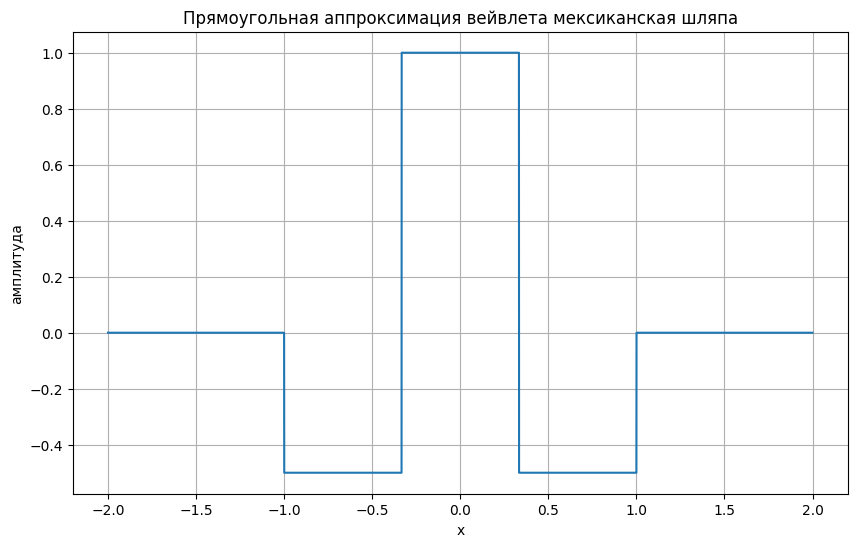

In [34]:
def psi_3(x):
  if np.abs(x)<1/3:
    return 1
  elif np.abs(x) >= 1/3 and np.abs(x) <= 1:
    return -1/2
  else:
    return 0

x = np.linspace(-2,2,10000)

psi3 = np.zeros((10000))

for i in range(0, 10000):
  psi3[i] = psi_3(x[i])

plt.figure(figsize=(10, 6))
plt.plot(x, psi3)
plt.title("Прямоугольная аппроксимация вейвлета мексиканская шляпа")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.grid()
plt.show()

$$
\tilde{\psi}(\Omega) = 
\int\limits_{-\infty}^{\infty}dx\ \psi(x)e^{-i\Omega x} = 

\int\limits_{-\infty}^{-1}dx\ 0*e^{-i\Omega x} 
+ \int\limits_{1}^{\infty}dx\ 0*e^{-i\Omega x} 

+ \int\limits_{-\frac{1}{3}}^{\frac{1}{3}}dx\ e^{-i\Omega x} 

- \frac{1}{2}\int\limits_{-1}^{-\frac{1}{3}}dx\ e^{-i\Omega x}

- \frac{1}{2}\int\limits_{\frac{1}{3}}^{1}dx\ e^{-i\Omega x} =
$$

$$

\int\limits_{-\frac{1}{3}}^{\frac{1}{3}}dx\ e^{-i\Omega x} 

- \frac{1}{2}\int\limits_{-1}^{-\frac{1}{3}}dx\ e^{-i\Omega x}

- \frac{1}{2}\int\limits_{\frac{1}{3}}^{1}dx\ e^{-i\Omega x} =
$$

$$

-\frac{1}{i \Omega }\int\limits_{-\frac{1}{3}}^{\frac{1}{3}}d(-i\Omega x)\ e^{-i\Omega x} 

+ \frac{1}{i \Omega }\frac{1}{2}\int\limits_{-1}^{-\frac{1}{3}}d(-i\Omega x)\ e^{-i\Omega x}

+ \frac{1}{i \Omega }\frac{1}{2}\int\limits_{\frac{1}{3}}^{1}d(-i\Omega x)\ e^{-i\Omega x} = 
$$

$$
-\frac{1}{i \Omega }(e^{-i\Omega  \frac{1}{3}} - e^{i\Omega \frac{1}{3}} )

+ \frac{1}{i \Omega }\frac{1}{2}(e^{i\Omega \frac{1}{3}} - e^{i\Omega } )

+ \frac{1}{i \Omega }\frac{1}{2}(e^{-i\Omega } - e^{-i\Omega \frac{1}{3}}) = 
$$

$$
\frac{2}{2 i \Omega }(e^{i\Omega \frac{1}{3}} - e^{-i\Omega  \frac{1}{3}} )

+ \frac{1}{i \Omega }\frac{1}{2}(e^{i\Omega \frac{1}{3}}  -  e^{i\Omega } + e^{-i\Omega } - e^{-i\Omega \frac{1}{3}})
=
$$

$$
\frac{2}{\Omega }(\sin{( \frac{\Omega}{3})} )

+ \frac{1}{i \Omega }\frac{1}{2}(e^{i\Omega \frac{1}{3}}  -  e^{i\Omega } + e^{-i\Omega } - e^{-i\Omega \frac{1}{3}})
=
$$

$$
\frac{2}{\Omega }(\sin{( \frac{\Omega}{3})} )

- \frac{1}{i \Omega }\frac{1}{2}( -e^{i\Omega \frac{1}{3}}  +  e^{i\Omega } - e^{-i\Omega } + e^{-i\Omega \frac{1}{3}})
=
$$

$$
\frac{2}{\Omega }(\sin{( \frac{\Omega}{3})} )

- \frac{1}{\Omega }( \frac{1}{i 2}(e^{-i\Omega \frac{1}{3}}-e^{i\Omega \frac{1}{3}})  +  \frac{1}{i 2}(e^{i\Omega } - e^{-i\Omega }) )
=
$$

$$
\frac{2}{\Omega }(\sin{( \frac{\Omega}{3})} )

- \frac{1}{\Omega }( -\frac{1}{i 2}(e^{i\Omega \frac{1}{3}} - e^{-i\Omega \frac{1}{3}})  
+  \sin(\Omega) )
=
$$

$$
\frac{2}{\Omega }(\sin( \frac{\Omega}{3}) )

- \frac{1}{\Omega }( -\sin(\frac{\Omega}{3})
+  \sin(\Omega) )
=
$$

$$
\frac{2}{\Omega }\sin( \frac{\Omega}{3}) 

+ \frac{1}{\Omega }\sin(\frac{\Omega}{3})
-  \frac{1}{\Omega }\sin(\Omega) 
=
$$

$$
\frac{3}{\Omega }\sin( \frac{\Omega}{3}) 
-  \frac{1}{\Omega }\sin(\Omega) 
=
$$

$$
\frac{1}{\Omega }\left(3\sin( \frac{\Omega}{3}) 
- \sin(\Omega) \right)
=
$$

по формуле тройного угла получаем ответ

$$
\frac{4}{\Omega } \sin^3(\frac{\Omega}{3})

$$

$$
x_c = \int\limits_{-\infty}^{\infty}dx\ x |\psi(x)|^2
$$



$$
x_c = \int\limits_{-\infty}^{\infty}dx\ x |\psi(x)|^2 = 


\int\limits_{-\frac{1}{3}}^{\frac{1}{3}}dx\  x \ 

+ \frac{1}{4}\int\limits_{-1}^{-\frac{1}{3}}dx\ x\ 

+ \frac{1}{4}\int\limits_{\frac{1}{3}}^{1}dx\ x \ 
= 0
$$

$$

\left.\frac{x^2}{2}\right|_{-\frac{1}{3}}^{\frac{1}{3}}

+ \frac{1}{4}\left.\frac{x^2}{2}\right|_{-1}^{-\frac{1}{3}}

+ \frac{1}{4}\left.\frac{x^2}{2}\right|_{\frac{1}{3}}^{1} = 
\frac{1}{2}(\frac{1}{9} - \frac{1}{9}) + \frac{1}{8}(\frac{1}{9} - 1) + \frac{1}{8}(1 - \frac{1}{9}) = 0
$$

$$
\Delta^2_x = \int\limits_{-\infty}^{\infty}dx\ (x-x_c)^2 |\psi(x)|^2 
$$

$$
\Delta^2_x = \int\limits_{-\infty}^{\infty}dx\ x^2 |\psi(x)|^2 =
$$
$$
\int\limits_{-\frac{1}{3}}^{\frac{1}{3}}dx\  x^2 \ 

+ \frac{1}{4}\int\limits_{-1}^{-\frac{1}{3}}dx\ x^2\ 

+ \frac{1}{4}\int\limits_{\frac{1}{3}}^{1}dx\ x^2 \ =
$$
$$
\left.\frac{x^3}{3}\right|_{-\frac{1}{3}}^{\frac{1}{3}}

+ \frac{1}{4}\left.\frac{x^3}{3}\right|_{-1}^{-\frac{1}{3}}

+ \frac{1}{4}\left.\frac{x^3}{3}\right|_{\frac{1}{3}}^{1} = 
$$
$$
\left.\frac{x^3}{3}\right|_{-\frac{1}{3}}^{\frac{1}{3}}

+ \frac{1}{12}\left.x^3\right|_{-1}^{-\frac{1}{3}}

+ \frac{1}{12}\left.x^3\right|_{\frac{1}{3}}^{1} = 
$$


$$
\left.\frac{x^3}{3}\right|_{-\frac{1}{3}}^{\frac{1}{3}}

+ \frac{1}{12}(\left.x^3\right|_{-1}^{-\frac{1}{3}}

+\left.x^3\right|_{\frac{1}{3}}^{1}) = 
$$

$$
\frac{1}{3} (\frac{1}{27} + \frac{1}{27})
+ \frac{1}{12}((-\frac{1}{27}+1) + (1-\frac{1}{27})) = 
$$


$$
\frac{1}{3} \frac{2}{27} + \frac{1}{12} (2-\frac{2}{27}) = 
\frac{1}{3} \frac{2}{27}  - \frac{1}{12}\frac{2}{27} + \frac{2}{12} = 
(\frac{4}{12} - \frac{1}{12}) \frac{2}{27}   + \frac{2}{12} = 
\frac{2}{12}  \frac{30}{27} =\frac{5}{27}
$$

$$
\Delta^2_x = \frac{5}{27}
$$

равенство Парсеваля и спектральня плотность

$$
\int\limits_{-\frac{1}{3}}^{\frac{1}{3}}dx\   \ 

+ \frac{1}{4}\int\limits_{-1}^{-\frac{1}{3}}dx\ \ 

+ \frac{1}{4}\int\limits_{\frac{1}{3}}^{1}dx\  \ 
= 
$$
$$
\frac{1}{3} + \frac{1}{3}  
- \frac{1}{4}\frac{1}{3} + \frac{1}{4}
+ \frac{1}{4} - \frac{1}{4}\frac{1}{3} 
= 1
$$

$$
P(\Omega) = |\tilde{\psi}(\Omega)|^2 = \frac{16}{\Omega^2 } \sin^6(\frac{\Omega}{3})
$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ P(\Omega) = 
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{16}{\Omega^2 } \sin^6(\frac{\Omega}{3}) = 
$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{2}{\Omega^2 } (1-\cos(\frac{2\Omega}{3}))^3 = 
$$



$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{2}{\Omega^2 } 
(1 - 3\cos(\frac{2\Omega}{3})
+3\cos^2(\frac{2\Omega}{3})
-\cos^3(\frac{2\Omega}{3})
) = 
$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{2}{\Omega^2 } 
(1 - 3\cos(\frac{2\Omega}{3})

+\frac{3}{2}+\frac{3}{2}\cos(\frac{4\Omega}{3})

- \frac{1}{4}\cos(\frac{6\Omega}{3}) - \frac{3}{4}\cos(\frac{2\Omega}{3}) ) = 

$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{2}{\Omega^2 } 
(1 +\frac{3}{2} 

- 3\cos(\frac{2\Omega}{3}) - \frac{3}{4}\cos(\frac{2\Omega}{3})

+\frac{3}{2}\cos(\frac{4\Omega}{3})

- \frac{1}{4}\cos(\frac{6\Omega}{3})  ) = 

$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{2}{\Omega^2 } 
(\frac{5}{2} 

- \frac{15}{4}\cos(\frac{2\Omega}{3})  

+\frac{3}{2}\cos(\frac{4\Omega}{3})

- \frac{1}{4}\cos(2\Omega)  ) = 

$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{1}{\Omega^2 } 
(5

- \frac{15}{2}\cos(\frac{2\Omega}{3})  

+3\cos(\frac{4\Omega}{3})

- \frac{1}{2}\cos(2\Omega)  ) = 

$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{1}{\Omega^2 } 
(5

- \frac{15}{2}\cos(\frac{2\Omega}{3})  

+3\cos(\frac{4\Omega}{3})

- \frac{1}{2}\cos(2\Omega)  ) = 

$$

$$
\frac{1}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{1}{\Omega^2 } 
(

\frac{15}{2}(1 - \cos(\frac{2\Omega}{3}))

-3(1-\cos(\frac{4\Omega}{3}))

+\frac{1}{2}(1-\cos(2\Omega) ) ) = 

$$

$$

\frac{15}{4\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1 - \cos(\frac{2\Omega}{3}))}{\Omega^2 }  

-\frac{3}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1-\cos(\frac{4\Omega}{3}))}{\Omega^2 } 

+\frac{1}{4\pi}  \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1-\cos(2\Omega) ) }{\Omega^2 }  

= 

$$

$$

\frac{15}{4\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1 - \cos(\frac{2\Omega}{3}))}{\Omega^2 }  

-\frac{3}{2\pi} \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1-\cos(\frac{4\Omega}{3}))}{\Omega^2 } 

+\frac{1}{4\pi}  \int\limits_{-\infty}^{\infty}d\Omega\ \frac{(1-\cos(2\Omega) ) }{\Omega^2 }  

= 

$$

эти интегралы можно свести к известному интегралу Дирихле или воспользовавшись табичной формулой
$$
\int\limits_{-\infty}^{\infty}dx \frac{(1 - \cos(a x))}{x^2} = \pi |a|
$$

$$

\frac{15}{4\pi} \frac{2}{3} \pi 

-\frac{3}{2\pi} \frac{4}{3} \pi    

+\frac{1}{4\pi} 2 \pi   

= 

$$

$$

\frac{15}{6\pi}   \pi 

-\frac{1}{\pi} 2 \pi    

+\frac{1}{2\pi}  \pi   

= 

$$

$$
\frac{15}{6} + \frac{3}{6} - 2 = \frac{18}{6} - 2 = 3 - 2 = 1
$$
Q.E.D.

график спектра мощности

<>:45: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:45: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/1492743308.py:45: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/1492743308.py:46: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


131072


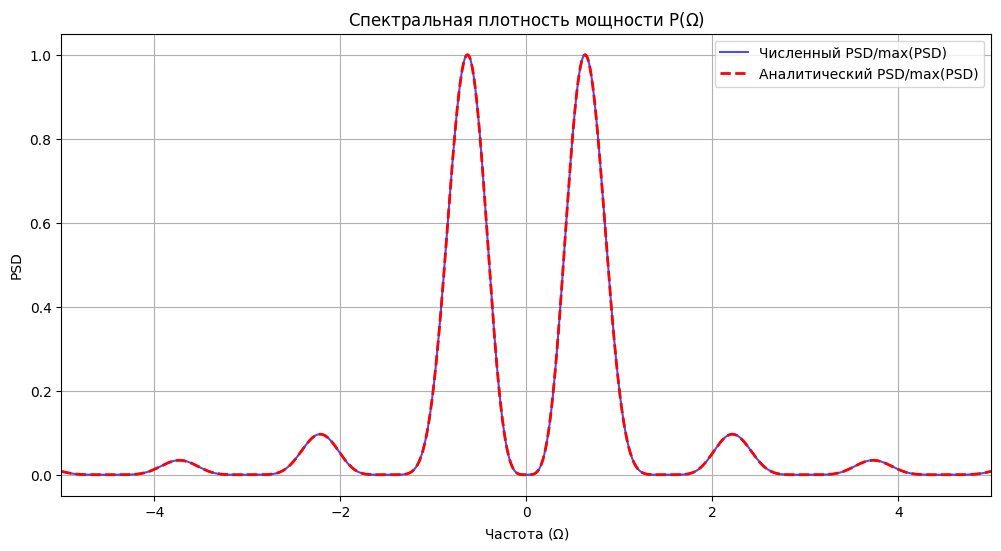

In [15]:
@nb.njit
def analitical_solut_2(w):
  # if w == 0:
  #   return 0
  
  return (16/(w**2))*((np.sin(w/3))**6)

# Параметры сигнала
mnog = 17
N = 2**mnog 
print(N)
x = np.linspace(-1111, 9, N )  # Дискретные значения x
dx = x[2] - x[1]
f_s = 1/dx
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # Соответствующие частоты
 
psi3 = np.zeros((N))

for i in range(0, N):
  psi3[i] = psi_3(x[i])

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi3))  # Сдвигаем нулевую частоту в центр

psd_numerical = np.abs(psi_fft) **2 

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = freqs != 0   
psd_analytic = np.zeros(N)
psd_analytic[mask] = analitical_solut_2(freqs[mask]*(2*np.pi))

psd_analytic[~mask] = 0   

# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(psd_numerical)
normir_analit= np.max(psd_analytic)
# Численный PSD
plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7)  

# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=2)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)  # Полный диапазон частот
plt.show()

численная проверка равенства Парсеваля

In [16]:
@nb.njit()
def pers_num2():
    x = np.linspace(-1000000, 1000000, 1000000000)
    dx = x[2]- x[1]
    sss = 0
    for i in range(len(x)):
        sss += analitical_solut_2(x[i])
    return sss*dx
pernum2 = pers_num2()/(2*np.pi)
pernum2

0.9999983959205653

Гаусс подобный вейвлет, вейвлет Рикера
$$
\psi(x) = -\frac{\sqrt{2}}{\pi^{\frac{1}{4}}} x e^{-\frac{x^2}{2}}
$$


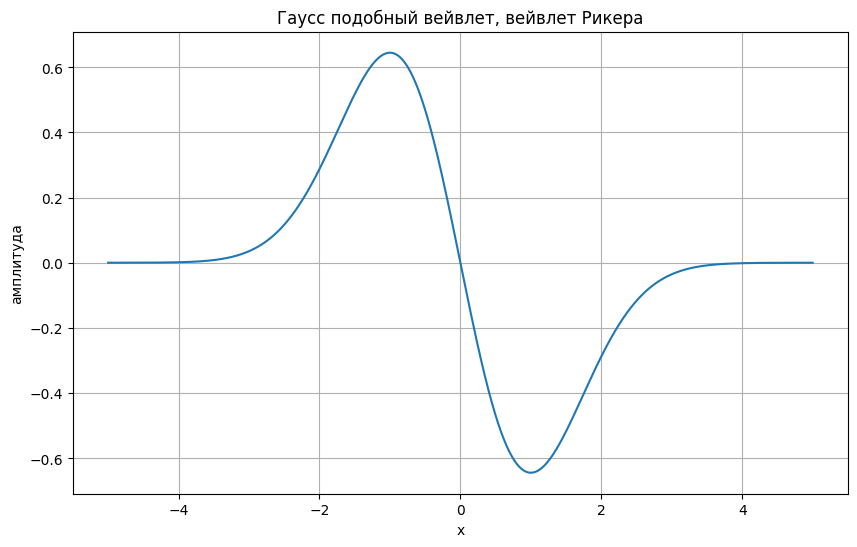

In [35]:
def psi_gauss(x):
  return -np.sqrt(2)/(np.pi**(1/4))*x*np.exp(-(x**2)/2)

x = np.linspace(-5,5,10000)

psi_gausss = np.zeros((10000))

for i in range(0, 10000):
  psi_gausss[i] = psi_gauss(x[i])

plt.figure(figsize=(10, 6))
plt.plot(x, psi_gausss)
plt.title("Гаусс подобный вейвлет, вейвлет Рикера")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.grid()
plt.show()

$$
\psi(x) = -\frac{\sqrt{2}}{\pi^{\frac{1}{4}}} x e^{-\frac{x^2}{2}} = \frac{\sqrt{2}}{\pi^{\frac{1}{4}}}\frac{d}{dx} e^{-\frac{x^2}{2}}
$$

по свойствам преобразовария фурье получаем и с использованием формулы 
$$
\int\limits_{-\infty}^{\infty}dx e^{-(ax^2+bx+c )} = \sqrt{\frac{\pi}{a}}e^{\frac{b^2}{4a}-c}
$$
$$
\tilde{\psi}(\Omega) = 
i\Omega \frac{\sqrt{2}}{\pi^{\frac{1}{4}}}\int\limits_{-\infty}^{\infty}dx\ e^{-(\frac{1}{2}x^2 + i\Omega x)} = 

i\Omega \frac{\sqrt{2}}{\pi^{\frac{1}{4}}} \sqrt{2\pi} e^{\frac{-\Omega^2}{2}}=
$$

$$
i\Omega 2 \pi^{\frac{1}{4}} e^{\frac{-\Omega^2}{2}}
$$

или напрямую

$$
\tilde{\psi}(\Omega) = 
-\int\limits_{-\infty}^{\infty}dx\  \frac{\sqrt{2}}{\pi^{\frac{1}{4}}} x e^{-\frac{x^2}{2}}e^{-i\Omega x} = 
$$

$$
a = \frac{\sqrt{2}}{\pi^{\frac{1}{4}}}
$$
$$
\tilde{\psi}(\Omega) = 
-a\int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{x^2}{2}}e^{-i\Omega x} = 
$$
$$
-\frac{1}{2}(x^2 + 2 i\Omega x + \Omega^2 - \Omega^2) = -\frac{1}{2}((x + i\Omega)^2 + \Omega^2)
$$
$$
\tilde{\psi}(\Omega) = 
-a\int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{1}{2}((x + i\Omega)^2 + \Omega^2)} = 
$$
$$
\tilde{\psi}(\Omega) = 
-a e^{-\frac{\Omega^2}{2}} \int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{1}{2}((x + i\Omega)^2)} = 
$$

$$
\tilde{\psi}(\Omega) = 
-a e^{-\frac{\Omega^2}{2}} \int\limits_{-\infty}^{\infty}dx\ (x + i\Omega) e^{-\frac{1}{2}((x + i\Omega)^2)} - i\Omega e^{-\frac{1}{2}((x + i\Omega)^2)}= 
$$
$$
\tilde{\psi}(\Omega) = 
-a e^{-\frac{\Omega^2}{2}} \left[ \int\limits_{-\infty}^{\infty}dx\ (x + i\Omega) e^{-\frac{1}{2}((x + i\Omega)^2)} - i\Omega \int\limits_{-\infty}^{\infty}dx e^{-\frac{1}{2}((x + i\Omega)^2)} \right]= 
$$

$$
\tilde{\psi}(\Omega) = 
-a e^{-\frac{\Omega^2}{2}} \left[ \int\limits_{-\infty}^{\infty}d(-\frac{1}{2}((x + i\Omega)^2))\ e^{-\frac{1}{2}((x + i\Omega)^2)} 

- i\Omega \int\limits_{-\infty}^{\infty}dx e^{-\frac{1}{2}((x + i\Omega)^2)} \right]= 
$$

так как на любой бесконечности $\frac{1}{e^{\frac{x^2}{2}}} \to 0$
$$
\left. e^{-\frac{1}{2}((x + i\Omega)^2)} \right|_{-\infty}^{\infty} = \left. \frac{1}{e^{\frac{x^2}{2}}}\frac{1}{e^{\frac{\Omega^2}{2}}}e^{2i\Omega x}\right|_{-\infty}^{\infty} = 0 
$$


$$
\tilde{\psi}(\Omega) = 
-a e^{-\frac{\Omega^2}{2}} \left[ 0 

- i\Omega \int\limits_{-\infty}^{\infty}dx e^{-\frac{1}{2}((x + i\Omega)^2)} \right]= 
$$

$$
\tilde{\psi}(\Omega) = 
a e^{-\frac{\Omega^2}{2}} \left[ i\Omega \sqrt{2\pi} \right]= 
$$
$$
\tilde{\psi}(\Omega) = 
\frac{\sqrt{2}}{\pi^{\frac{1}{4}}} e^{-\frac{\Omega^2}{2}} i\Omega \sqrt{2\pi}= 
$$
$$
i\Omega 2 \pi^{\frac{1}{4}} e^{\frac{-\Omega^2}{2}}
$$

$$
x_c = \int_{-\infty}^{\infty} x |\psi(x)|^2 dx = a^2 \int_{-\infty}^{\infty} x^3 e^{-x^2} dx  
$$
$$
f(x) = x^3 e^{-x^2}
$$
$$
f(-x) = -x^3 e^{-x^2} = -f(x)
$$
для нечетных функций интеграл на симметричных интервалах равен 0
$$
x_c = 0
$$

$$
\Delta_x^2 = \int_{-\infty}^{\infty} (x - x_c)^2 |\psi(x)|^2 dx = a^2 \int_{-\infty}^{\infty} x^4 e^{-x^2} dx 
$$
для четной функции симметричный интервал меняется на удвоенный от среднего 
$$
f(x) = x^4 e^{-x^2}
$$
$$
f(-x) = x^4 e^{-x^2} = f(x)
$$
$$
 2 a^2 \int_{0}^{\infty} x^4 e^{-x^2} dx = 
$$
используя табличную формулу для $n = 2k$
$$
 \int_{0}^{\infty} x^{n} e^{-ax^2} dx = \frac{(2k-1)!!}{2^{k+1}a^k}\sqrt{\frac{\pi}{a}} 
$$
$$
\Delta_x^2 = a^2 \frac{3}{4}\sqrt{\pi} = \frac{2}{\sqrt{\pi}} \frac{3}{4}\sqrt{\pi} = \frac{3}{2}
$$

$$
\Omega_c = \int\limits_{-\infty}^{\infty}d\Omega \ \Omega |\tilde{\psi}(\Omega)|^2
$$

$$
\Omega_c =  4 \sqrt{\pi}\int\limits_{-\infty}^{\infty}d\Omega \ \Omega^3 e^{-\Omega^2} 
$$
$$
f(x) = x^3 e^{-x^2}
$$
$$
f(-x) = -x^3 e^{-x^2} = -f(x)
$$
для нечетных функций интеграл на симметричных интервалах равен 0
$$
\Omega_c = 0
$$

$$
\Delta_{\Omega}^2 = \int_{-\infty}^{\infty}(\Omega - \Omega_c)^2 |\tilde{\psi}(\Omega)|^2 d\Omega
$$

$$
a = 2 \pi^{\frac{1}{4}}
$$
$$
a^2 = 4 \sqrt{\pi}
$$

$$
\Delta_{\Omega}^2 = a^2\int_{-\infty}^{\infty}\Omega^4 e^{-\Omega^2} d\Omega = 2 a^2\int_{0}^{\infty}\Omega^4 e^{-\Omega^2} d\Omega =
\frac{3}{4}\sqrt{\pi} a^2 = \frac{3}{4}\sqrt{\pi} 4 \sqrt{\pi} = 3 \pi
$$

найдем нормирующий множитель:
$$ 
I = \int_{-\infty}^{\infty} |\tilde{\psi}(\Omega)|^2 d\Omega = \int_{-\infty}^{\infty} \Omega^2 4 \pi^{\frac{1}{2}} e^{-\Omega^2} d\Omega = 4 \pi^{\frac{1}{2}} \int_{-\infty}^{\infty} \Omega^2  e^{-\Omega^2} d\Omega = 8 \pi^{\frac{1}{2}} \frac{1}{4} \pi^{\frac{1}{2}} = 2 \pi 
$$

откуда окончательный ответ:
$$
\Delta_{\Omega}^2 = \frac{3\pi}{I} = \frac{3\pi}{2 \pi} = \frac{3}{2}
$$
$$
\Delta_{\Omega} = \sqrt{\frac{3}{2}}
$$

спектр мощности и численное сравнение результата

In [17]:
def power_5(w):
    # if w == 0:
    #     return 0
    return 2*(np.pi**(1/4))*1j*w*np.exp(-(w**2)/2)

def num_5_psi(x):
    # if x == 0:
    #     return 0
    return -x*np.exp(-(x**2)/2)*np.sqrt(2)/(np.pi**(1/4))

<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/3036956716.py:38: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/3036956716.py:39: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


131072


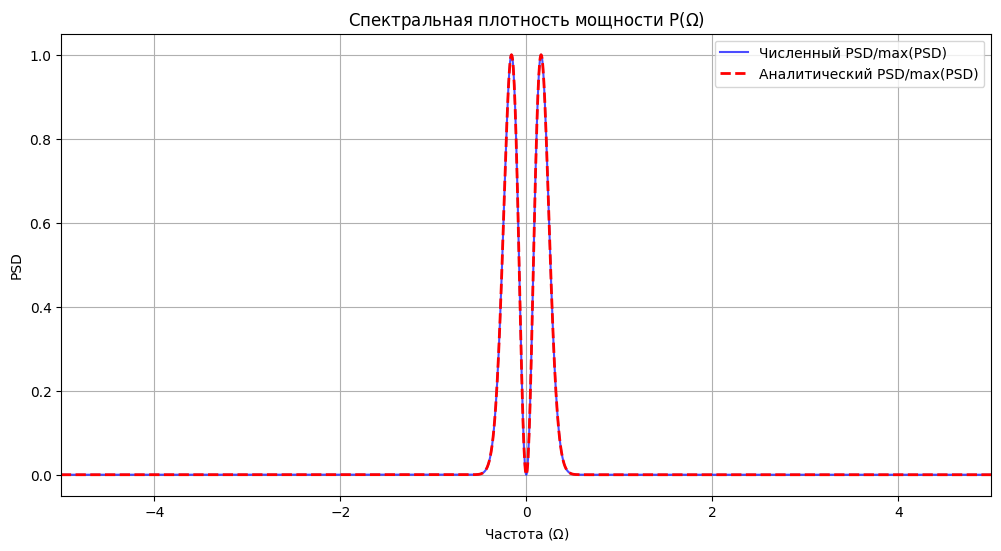

In [18]:
# Параметры сигнала
mnog = 17
N = 2**mnog 
print(N)
x = np.linspace(-101, 100, N )  # Дискретные значения x
dx = x[2] - x[1]
f_s = 1/dx
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # Соответствующие частоты
 
psi5 = np.zeros((N))

for i in range(0, N):
  psi5[i] = num_5_psi(x[i])

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi5))  # Сдвигаем нулевую частоту в центр

psd_numerical = np.abs(psi_fft) **2 

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = freqs != 0  # Исключаем f=0, чтобы избежать деления на 0
psd_analytic = np.zeros((N), dtype=np.complex128)
psd_analytic[mask] = power_5(freqs[mask]*(2*np.pi))

psd_analytic[~mask] = 0   
psd_analytic = np.abs(psd_analytic)**2
# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(psd_numerical)
normir_analit= np.max(psd_analytic)
# Численный PSD
plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7)  

# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=2)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)  # Полный диапазон частот
plt.show()

MHAT-вейвлет

$$
\psi(x) = \frac{2}{\sqrt{3\sqrt{\pi}}} (1-x^2) e^{-\frac{x^2}{2}} 
$$
$$
a = \frac{2}{\sqrt{3\sqrt{\pi}}}
$$

$$
\psi(x) = a \frac{d}{dx} x e^{-\frac{x^2}{2}}
$$

по свойствам преобразовария фурье получаем и с использованием формулы 
$$
\int\limits_{-\infty}^{\infty} x e^{-(ax-b)^2} dx = b \sqrt{\frac{\pi}{a}}
$$
$$
-\frac{1}{2}(x^2 + 2 i\Omega x + \Omega^2 - \Omega^2) = -\frac{1}{2}((x + i\Omega)^2 + \Omega^2)
$$
$$
\tilde{\psi}(\Omega) = 

i\Omega a \int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{x^2}{2}} e^{-i \Omega x} = 

i\Omega a \int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{1}{2}((x + i\Omega)^2 + \Omega^2)} = 
$$
$$
i\Omega a e^{-\frac{\Omega^2}{2}} \int\limits_{-\infty}^{\infty}dx\ x e^{-\frac{1}{2}((x + i\Omega)^2)} = a \Omega^2  e^{-\frac{\Omega^2}{2}} \sqrt{2\pi} 
$$



$$
\tilde{\psi}(\Omega) =  \frac{2}{\sqrt{3\sqrt{\pi}}} \sqrt{2\pi} \Omega^2  e^{-\frac{\Omega^2}{2}}  = 2 \sqrt{\frac{2\sqrt{\pi}}{3}}  \Omega^2  e^{-\frac{\Omega^2}{2}} 
$$

Графики:

In [19]:
def psi_7(x):
    a = (2/(np.sqrt(3*np.sqrt(np.pi))))
    return a*(1-x**2)*np.exp(-(x**2)/2)

def ft_psi_7(w):
    a = (2/(np.sqrt(3*np.sqrt(np.pi))))
    return a*np.sqrt(2*np.pi)*w**2*np.exp(-(w**2)/2)

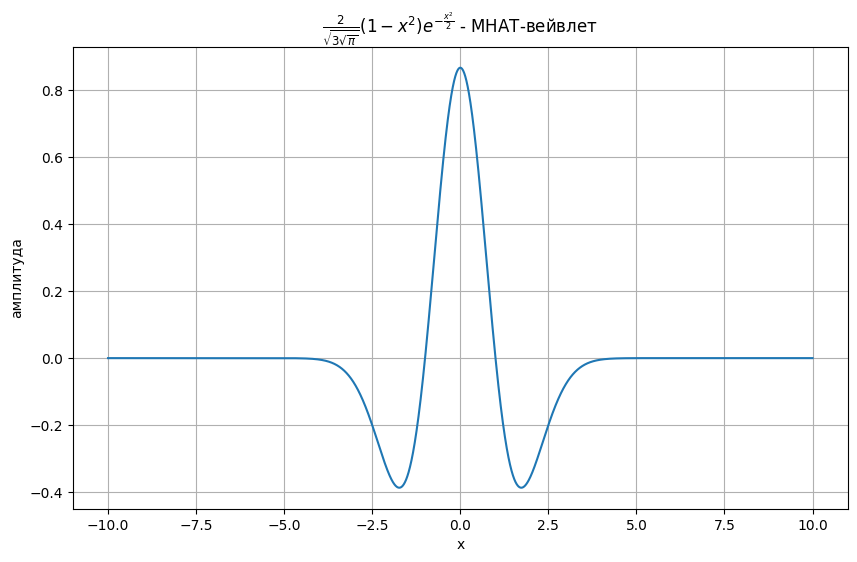

In [36]:
x = np.linspace(-10,10,10000)

psi7 = np.zeros((10000))

for i in range(0, 10000):
  psi7[i] = psi_7(x[i])

plt.figure(figsize=(10, 6))
plt.plot(x, psi7)
plt.title(r"$\frac{2}{\sqrt{3\sqrt{\pi}}} (1-x^2) e^{-\frac{x^2}{2}}$ - MHAT-вейвлет")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.grid()
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/4052766731.py:38: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/4052766731.py:39: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


131072


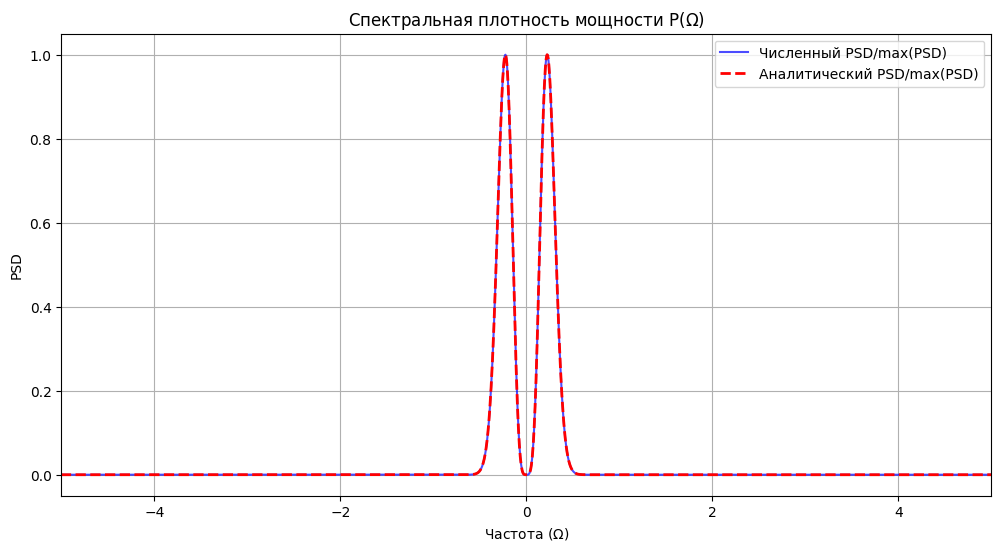

In [21]:
# Параметры сигнала
mnog = 17
N = 2**mnog 
print(N)
x = np.linspace(-101, 100, N )  # Дискретные значения x
dx = x[2] - x[1]
f_s = 1/dx
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # Соответствующие частоты
 
psi7 = np.zeros((N))

for i in range(0, N):
  psi7[i] = psi_7(x[i])

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi7))  # Сдвигаем нулевую частоту в центр

psd_numerical = np.abs(psi_fft) **2 

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = freqs != 0  # Исключаем f=0, чтобы избежать деления на 0
psd_analytic = np.zeros((N), dtype=np.complex128)
psd_analytic[mask] = ft_psi_7(freqs[mask]*(2*np.pi))

psd_analytic[~mask] = 0   
psd_analytic = np.abs(psd_analytic)**2
# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(psd_numerical)
normir_analit= np.max(psd_analytic)
# Численный PSD

plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7) 
# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=2)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)  # Полный диапазон частот
plt.show()

Вейвлет Морле

$$
\Omega_{0} = 2\pi
$$
$$ 
\psi(x) = D e^{-\frac{x^2}{2}} \left(e^{i\Omega_{0}x} - e^{-\frac{\Omega_{0}^2}{2}} \right)
$$

$$ 
\int\limits_{-\infty}^{\infty}dx\ |\psi(x)|^2 = 
D^2 \int\limits_{-\infty}^{\infty}dx\ e^{-x^2} \left(e^{i\Omega_{0}x} - e^{-\frac{\Omega_{0}^2}{2}} \right)\left(e^{-i\Omega_{0}x} - e^{-\frac{\Omega_{0}^2}{2}} \right)=
$$

$$ 
D^2 \int\limits_{-\infty}^{\infty}dx\ e^{-x^2} \left(1 
- e^{i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
- e^{-i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
+ e^{-\Omega_{0}^2}\right)=
$$

$$ 
D^2 \int\limits_{-\infty}^{\infty}dx\  \left(
e^{-x^2}
- e^{-x^2}e^{i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
- e^{-x^2}e^{-i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
+ e^{-x^2}e^{-\Omega_{0}^2}\right)=
$$

$$ 
D^2   \left(
\int\limits_{-\infty}^{\infty}dx\ e^{-x^2}
- \int\limits_{-\infty}^{\infty}dx\ e^{-x^2}e^{i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
- \int\limits_{-\infty}^{\infty}dx\ e^{-x^2}e^{-i\Omega_{0}x}e^{-\frac{\Omega_{0}^2}{2}} 
+ \int\limits_{-\infty}^{\infty}dx\ e^{-x^2}e^{-\Omega_{0}^2}\right)=
$$

$$ 
D^2  
\left(
\sqrt{\pi}
- \int\limits_{-\infty}^{\infty}dx\ e^{-x^2 + i\Omega_{0}x -\frac{\Omega_{0}^2}{2}} 
- \int\limits_{-\infty}^{\infty}dx\ e^{-x^2 -i\Omega_{0}x -\frac{\Omega_{0}^2}{2}} 
+ \sqrt{\pi}e^{-\Omega_{0}^2} 
\right)=
$$

$$ 
D^2  
\left(
\sqrt{\pi}
- \int\limits_{-\infty}^{\infty}dx\ e^{-(x^2 - i\Omega_{0}x +\frac{\Omega_{0}^2}{2})} 
- \int\limits_{-\infty}^{\infty}dx\ e^{-(x^2 + i\Omega_{0}x +\frac{\Omega_{0}^2}{2})} 
+ \sqrt{\pi}e^{-\Omega_{0}^2} 
\right)=
$$

$$ 
D^2  
\left(
\sqrt{\pi}
- \sqrt{\pi} e^{\frac{-\Omega_{0}^2}{4} - \frac{\Omega_{0}^2}{2}}
- \sqrt{\pi} e^{\frac{-\Omega_{0}^2}{4} - \frac{\Omega_{0}^2}{2}}
+ \sqrt{\pi}e^{-\Omega_{0}^2} 
\right)=
$$

$$ 
D^2  
\left(
\sqrt{\pi}
- 2\sqrt{\pi} e^{\frac{-\Omega_{0}^2}{4} - \frac{\Omega_{0}^2}{2}}
+ \sqrt{\pi}e^{-\Omega_{0}^2} 
\right)=
$$
$$ 
D^2 \sqrt{\pi}  
\left(
1
- 2  e^{\frac{-\Omega_{0}^2}{4} - \frac{\Omega_{0}^2}{2}}
+  e^{-\Omega_{0}^2} 
\right)=
$$

$$ 
D^2 \sqrt{\pi}  
\left(
1
- 2  e^{-\frac{3\Omega_{0}^2}{4} }
+  e^{-\Omega_{0}^2} 
\right)=
$$

$$ 
D^2 \sqrt{\pi}  
\left(
1
- 2  e^{-\frac{3\Omega_{0}^2}{4} }
+  e^{-\Omega_{0}^2} 
\right)= 1
$$
$$ 
D = \frac{1}{\sqrt{\sqrt{\pi}  
\left(
1
- 2  e^{-\frac{3\Omega_{0}^2}{4} }
+  e^{-\Omega_{0}^2} 
\right)}} 
$$

$$
\tilde{\psi}(\Omega) = D \int\limits_{-\infty}^{\infty}dx\ e^{-\frac{x^2}{2}} \left(e^{i\Omega_{0}x} - e^{-\frac{\Omega_{0}^2}{2}} \right) e^{-i\Omega x} = 
$$

$$
D \int\limits_{-\infty}^{\infty}dx\ e^{-\frac{x^2}{2}} \left(e^{i\Omega_{0}x}e^{-i\Omega x} - e^{-\frac{\Omega_{0}^2}{2}}e^{-i\Omega x} \right)  = 
$$

$$
D \int\limits_{-\infty}^{\infty}dx\  \left(e^{-\frac{x^2}{2}}e^{i(\Omega_{0} -\Omega) x} 
 - e^{-\frac{x^2}{2}}e^{-\frac{\Omega_{0}^2}{2}}e^{-i\Omega x} \right)  = 
$$

$$
D   \left(\int\limits_{-\infty}^{\infty}dx\ e^{-\frac{x^2}{2}}e^{i(\Omega_{0} -\Omega) x} 
 - \int\limits_{-\infty}^{\infty}dx\ e^{-\frac{x^2}{2}}e^{-\frac{\Omega_{0}^2}{2}}e^{-i\Omega x} \right)  = 
$$

$$
D   \left(\int\limits_{-\infty}^{\infty}dx\ e^{-(\frac{x^2}{2} - i(\Omega_{0} -\Omega) x)}
 - e^{-\frac{\Omega_{0}^2}{2}}\int\limits_{-\infty}^{\infty}dx\ e^{-(\frac{x^2}{2}+i\Omega x)}  \right)  = 
$$

$$
\tilde{\psi}(\Omega) = D  \sqrt{2\pi}\left(  e^{\frac{-(\Omega_{0} -\Omega)^2}{2}}
 - e^{-\frac{\Omega_{0}^2}{2}} e^{\frac{-\Omega^2}{2}} \right) 
$$

$$
\tilde{\psi}(\Omega) = D  \sqrt{2\pi}\left(  e^{\frac{-(\Omega_{0} -\Omega)^2}{2}}
 - e^{-\frac{\Omega_{0}^2}{2}-\frac{\Omega^2}{2}} \right) 
$$
Окончательный ответ:
$$
\tilde{\psi}(\Omega) = D  \sqrt{2\pi}\left(  e^{\frac{-(\Omega_{0} -\Omega)^2}{2}}
 - e^{-\frac{(\Omega_{0}^2 + \Omega^2)}{2}} \right) 
$$

при полной подстановке:
$$
\Omega_{0} = 2\pi
$$
$$ 
D = \frac{1}{\sqrt{\sqrt{\pi}  
\left(
1
- 2  e^{-3\pi^2 }
+  e^{- 4 \pi^2} 
\right)}} 
$$
$$
\tilde{\psi}(\Omega) = \frac{\sqrt{2\pi}\left(  e^{\frac{-(2\pi -\Omega)^2}{2}}
 - e^{-(2 \pi^2+\frac{\Omega^2}{2})} \right) }{\sqrt{\sqrt{\pi}  
\left(
1
- 2  e^{-3\pi^2 }
+  e^{- 4 \pi^2} 
\right)}} 


$$

Графики:

In [22]:
def psi_9(x):
    om_0 = 2*np.pi
    
    D = 1/np.sqrt(np.sqrt(np.pi)*(1-2*np.exp(-((3/4)*om_0**2))+np.exp(-(om_0**2))))
    
    return D*np.exp(-(1/2)*(x**2))*(np.exp((1j*om_0*x)) - np.exp(-(1/2)*(om_0**2)))

In [23]:
def ft_psi_9(w):
    om_0 = 2*np.pi
    D = 1/np.sqrt(np.sqrt(np.pi)*(1-2*np.exp(-((3/4)*om_0**2))+np.exp(-(om_0**2))))
    # term1 = np.sqrt(2*np.pi)*np.exp(-(1/2)*(w-2*np.pi)**2)
    # term2 = -np.sqrt(2*np.pi)*np.exp(-(1/2)*(w)**2 - 2*np.pi**2)
    term1 = np.sqrt(2*np.pi)*np.exp(-(1/2)*(om_0-w)**2)
    term2 = -np.sqrt(2*np.pi)*np.exp(-(1/2)*(w)**2 - (1/2)*om_0**2)
    return  (term1 + term2)*D

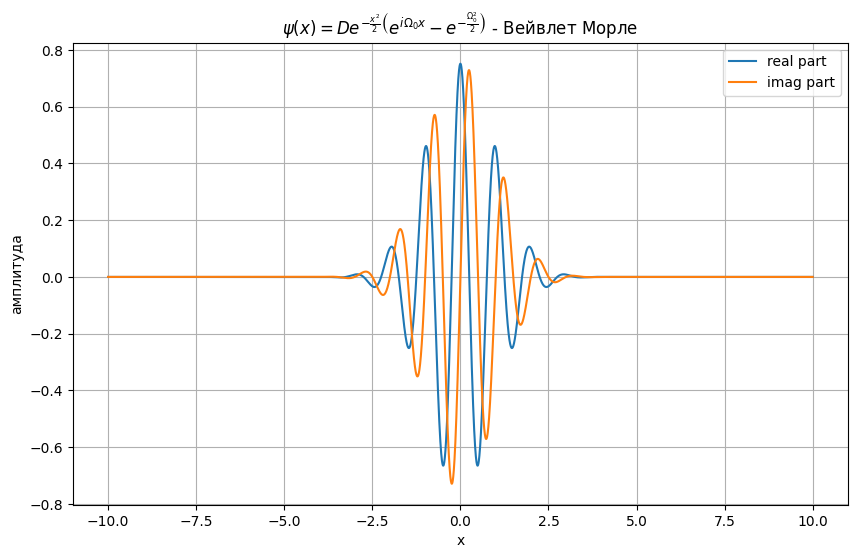

In [37]:
x = np.linspace(-10,10,10000)

psi9 = np.zeros((10000), dtype=np.complex128)

for i in range(0, 10000):
  psi9[i] = psi_9(x[i])

plt.figure(figsize=(10, 6))
plt.plot(x, np.real(psi9), label="real part")
plt.plot(x, np.imag(psi9), label="imag part")
plt.title(r"$\psi(x) = D e^{-\frac{x^2}{2}} \left(e^{i\Omega_{0}x} - e^{-\frac{\Omega_{0}^2}{2}} \right)$ - Вейвлет Морле")
plt.xlabel("x")
plt.ylabel("амплитуда")
plt.legend()
plt.grid()
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/179854907.py:39: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_34412/179854907.py:40: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


131072


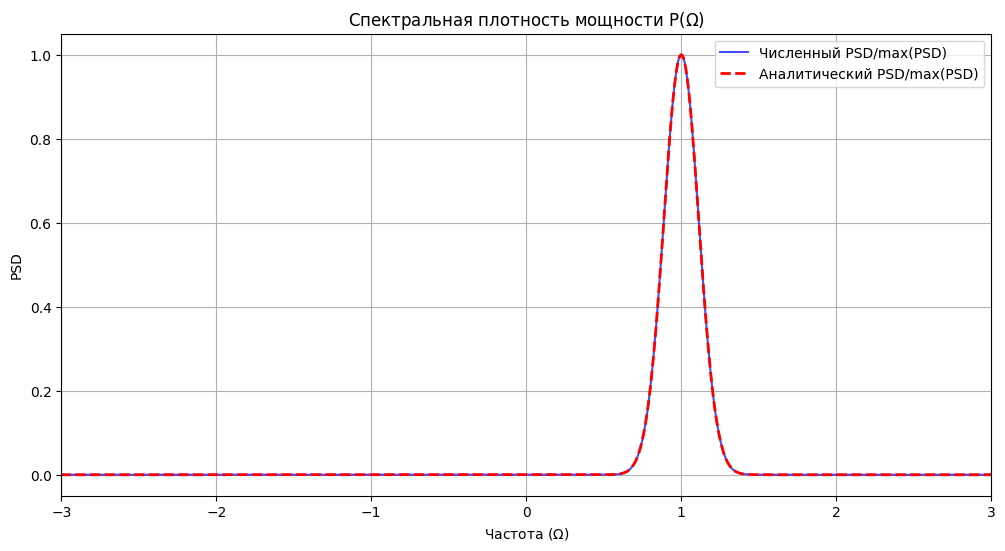

In [25]:
# Параметры сигнала
mnog = 17
N = 2**mnog 
print(N)
x = np.linspace(-101, 101, N )  # Дискретные значения x
dx = x[2] - x[1]
f_s = 1/dx
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # Соответствующие частоты
 
psi9 = np.zeros((N), dtype=np.complex128)

for i in range(0, N):
  psi9[i] = psi_9(x[i])

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi9))  # Сдвигаем нулевую частоту в центр

psd_numerical = np.abs(psi_fft) **2 

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = freqs != 0  # Исключаем f=0, чтобы избежать деления на 0
# psd_analytic = np.zeros((N), dtype=np.complex128)
psd_analytic = np.zeros((N))
psd_analytic[mask] = ft_psi_9(freqs[mask]*(2*np.pi) )

psd_analytic[~mask] = 0   
psd_analytic = np.abs(psd_analytic)**2
# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(psd_numerical)
normir_analit= np.max(psd_analytic)
# Численный PSD
plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7) # 

# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=2)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-3, 3) 
plt.show()